In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib.colors as colors

In [3]:
import matplotlib.image as mpimg
img = mpimg.imread('/Users/bussonniermatthias/Desktop/matlab-imshow-colormap-jet-255.png')[:,:,:3]
#img = mpimg.imread('/Users/bussonniermatthias/Desktop/download-2.png')[:,:,:3]

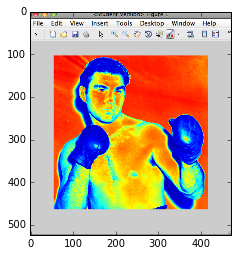

In [11]:
plt.imshow(img)

In [4]:
#res = np.zeros(shape=img.shape[:2])

In [5]:
from scipy.spatial import cKDTree

In [6]:
from ipywidgets import interact

In [7]:
#@interact(sub=(0, 500), d=(0,1,0.05))
def convert(sub=256,d=0.2, cin='jet', cout='viridis'):
    viridis = plt.get_cmap(cout)
    jet = plt.get_cmap(cin)
    jet256 = colors.makeMappingArray(sub, jet)[:, :3]
    K = cKDTree(jet256)
    oshape = img.shape
    img_data = img.reshape((-1,3))
    res = K.query(img_data, distance_upper_bound=d)
    indices = res[1]
    l = len(jet256)
    indices = indices.reshape(oshape[:2])
    remapped = indices

    indices.max()

    mask = (indices == l)

    remapped = remapped / (l-1)
    mask = np.stack( [mask]*3, axis=-1)

    blend = np.where(mask, img, viridis(remapped)[:,:,:3])
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax.imshow(blend)

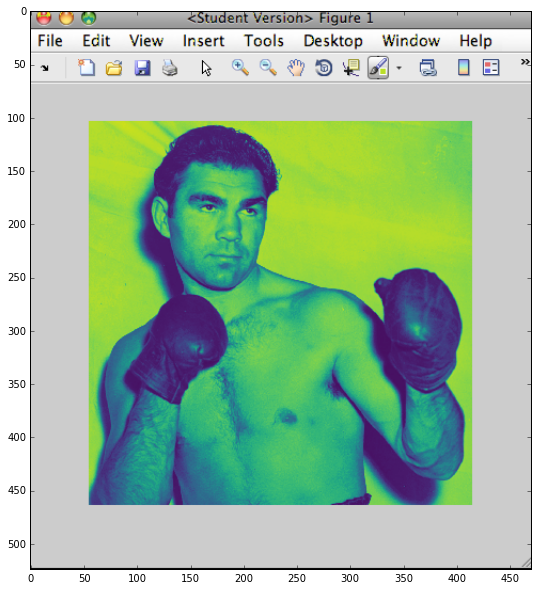

In [8]:
convert()

In [9]:
#fig.savefig('viridize.png')x

In [10]:
#!open viridize.png